In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and array operations

# Importing visualization libraries
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating attractive and informative statistical graphics


In [ ]:
# Importing the yfinance library to fetch stock market data
import yfinance as yf

# Fetching stock data for specific companies
ms = yf.Ticker("MS")  # Morgan Stanley
jpm = yf.Ticker("JPM")  # JPMorgan Chase
gs = yf.Ticker("GS")  # Goldman Sachs
hsbc = yf.Ticker("HSBC")  # HSBC Holdings

In [ ]:
# Retrieving historical stock market data for the past 10 years
ms_hist = ms.history(period="10y")
jpm_hist = jpm.history(period="10y")
gs_hist = gs.history(period="10y")
hsbc_hist = hsbc.history(period="10y")

In [ ]:
ms_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-26 00:00:00-05:00,29.664575,29.756084,29.512057,29.527309,3091700,0.0,0.0
2014-12-29 00:00:00-05:00,29.489184,29.878105,29.374798,29.710335,3466900,0.0,0.0
2014-12-30 00:00:00-05:00,29.489184,29.801847,29.412927,29.740839,4010600,0.0,0.0
2014-12-31 00:00:00-05:00,29.832333,29.885714,29.580682,29.588306,6492900,0.0,0.0
2015-01-02 00:00:00-05:00,29.778963,29.855223,29.168895,29.519684,7333800,0.0,0.0


In [ ]:
# Creating a list of historical stock data for easier iteration and processing
stock_list = [ms_hist, jpm_hist, gs_hist, hsbc_hist]

# Creating a list of corresponding stock names for labeling and identification
name_list = ['MS', 'JPM', 'GS', 'HSBC']

In [ ]:
# Printing the sum of null values for each stock's historical dat
for i,hist in enumerate(stock_list):
  print(f"sum of null values in {name_list[i]}: \n{hist.isna().sum()}")

sum of null values in MS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in JPM: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in GS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in HSBC: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
# Printing the sum of duploicate values for each stock's historical dat
for i,hist in enumerate(stock_list):
  print(f"sum of duplicate values in {name_list[i]}: \n{hist.duplicated().sum()}")

sum of duplicate values in MS: 
0
sum of duplicate values in JPM: 
0
sum of duplicate values in GS: 
0
sum of duplicate values in HSBC: 
0


In [ ]:
for i,hist in enumerate(stock_list):
  # Printing descriptive statistics for each stock's historical data
  print(f"Describe {name_list[i]}: \n{hist.describe()}")

Describe MS: 
              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     54.890047    55.496818    54.290252    54.890433  1.022186e+07   
std      26.859669    27.127462    26.593174    26.853393  5.101206e+06   
min      16.881699    17.240054    16.484390    16.897280  2.087800e+06   
25%      34.274898    34.588131    33.864482    34.154899  6.895275e+06   
50%      42.703981    42.983903    42.181128    42.522337  8.951050e+06   
75%      80.346611    81.061325    79.217305    80.192705  1.206862e+07   
max     135.440002   136.240005   133.960007   134.990005  5.853350e+07   

         Dividends  Stock Splits  
count  2516.000000        2516.0  
mean      0.007075           0.0  
std       0.065258           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       0.925000           0

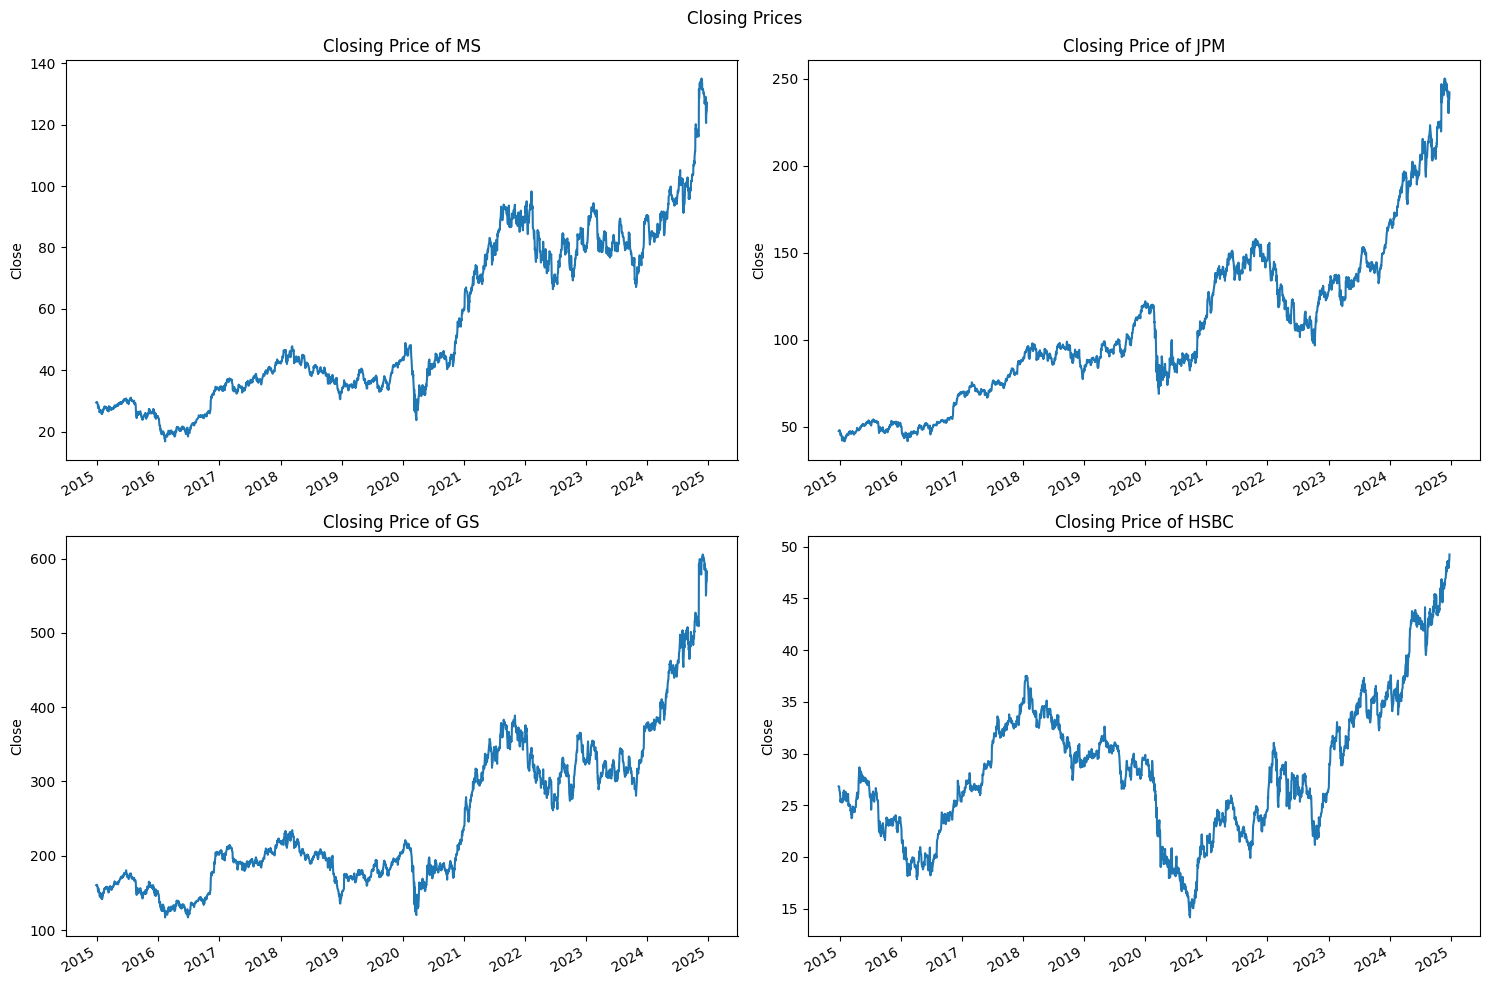

In [ ]:
# Plot closing prices for each stock

plt.figure(figsize=(15, 10))

# Adjusting subplot spacing to prevent overlapping
plt.subplots_adjust(top=1.25, bottom=1.2)

# Looping through each company's historical stock data and index
for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    company['Close'].plot()  # Visualizing the closing prices of the company's stock

    # Adding labels and title for each subplot
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name_list[i-1]}")

# Adding a title for the entire figure
plt.suptitle("Closing Prices")
plt.tight_layout()  # Automatically adjusts spacing to minimize overlap between subplots


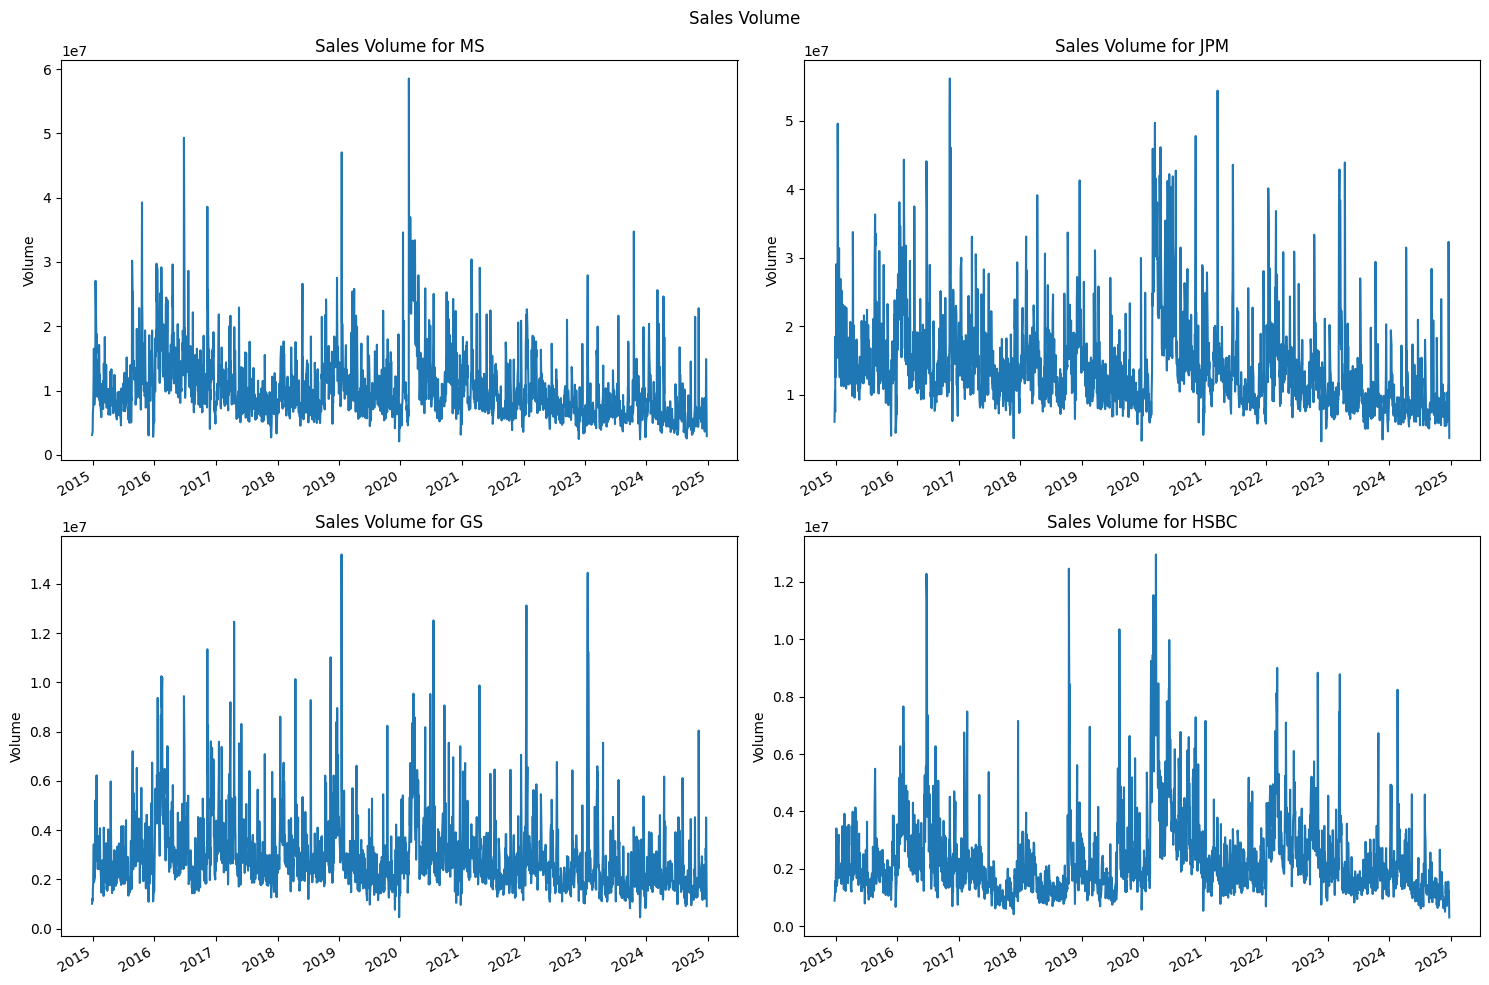

In [ ]:
# Plot volume for each stock
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)  # Adjusts spacing at the top and bottom of the figure

# Looping through each company's historical stock data and index
for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    # Plotting the 'Volume' for the company
    company['Volume'].plot()

    # Adding labels and title for each subplot
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name_list[i - 1]}")

# Adding a title for the entire figure
plt.suptitle('Sales Volume')


plt.tight_layout()

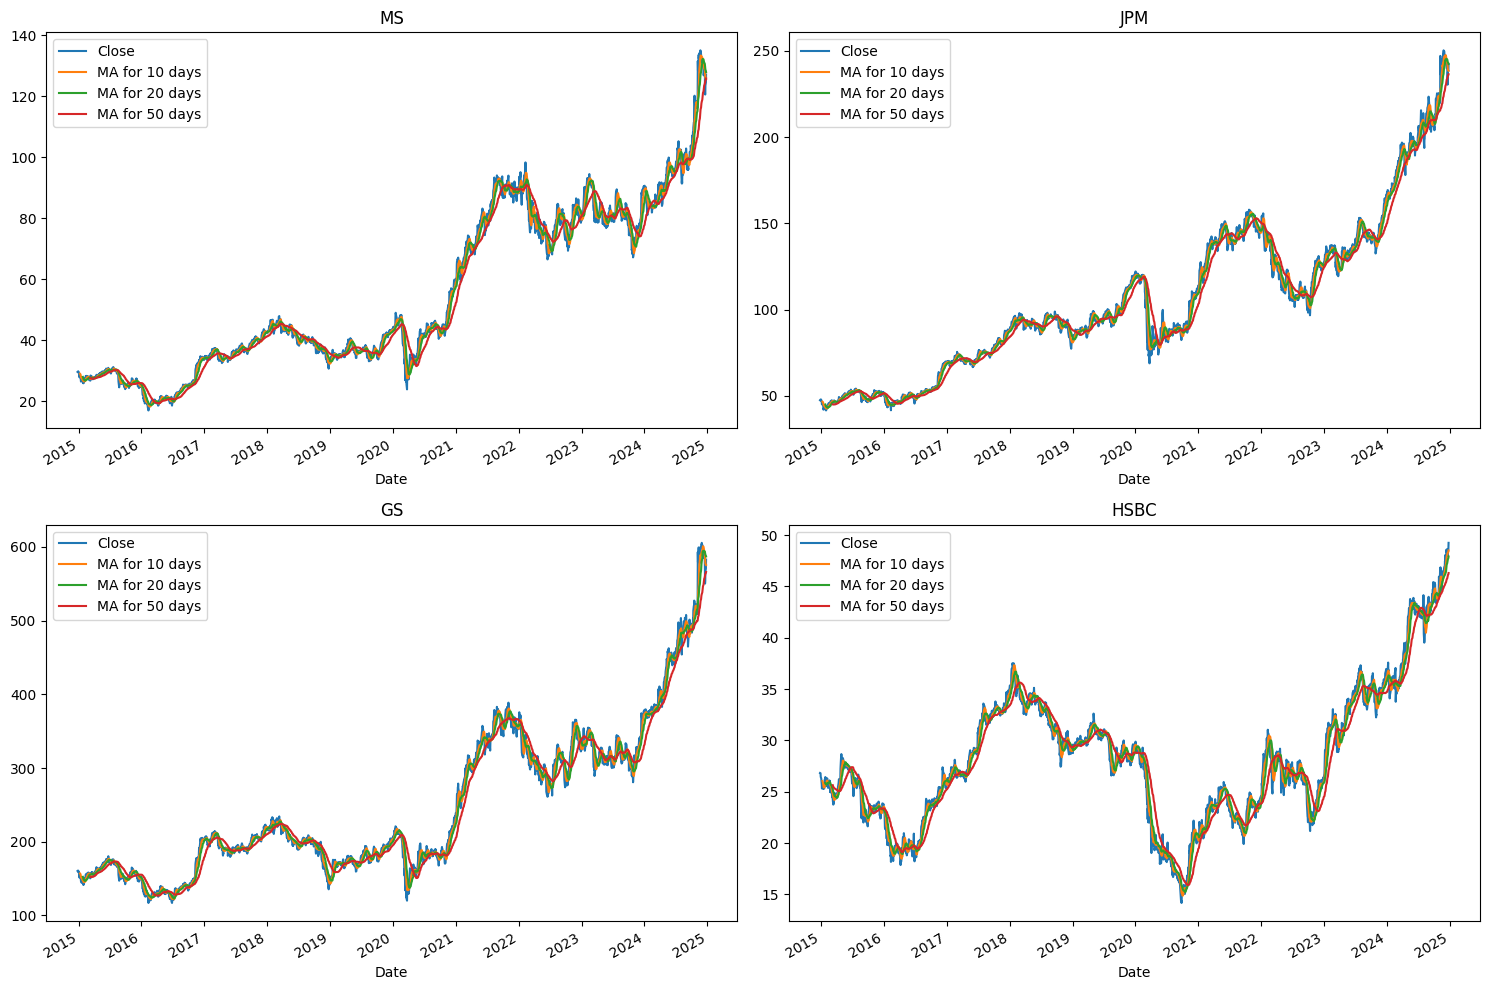

In [ ]:
# Calculate and plot moving averages for each stock
ma_day = [10, 20, 50]

# Calculating moving averages for each company
for ma in ma_day:
    for company in stock_list:
        # Creating a new column name for the moving average
        column_name = f"MA for {ma} days"
        # Adding a column to calculate the moving average of the 'Close' price
        company[column_name] = company['Close'].rolling(ma).mean()

# Setting up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)  # Setting the height of the figure
fig.set_figwidth(15)  # Setting the width of the figure
# Plotting the 'Close' price and moving averages for each company
# Morgan Stanley (MS)
ms_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MS')

# JPMorgan Chase (JPM)
jpm_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JPM')

# Goldman Sachs (GS)
gs_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GS')

# HSBC Holdings (HSBC)
hsbc_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HSBC')

fig.tight_layout()  # Automatically adjusts spacing between subplots
plt.show()

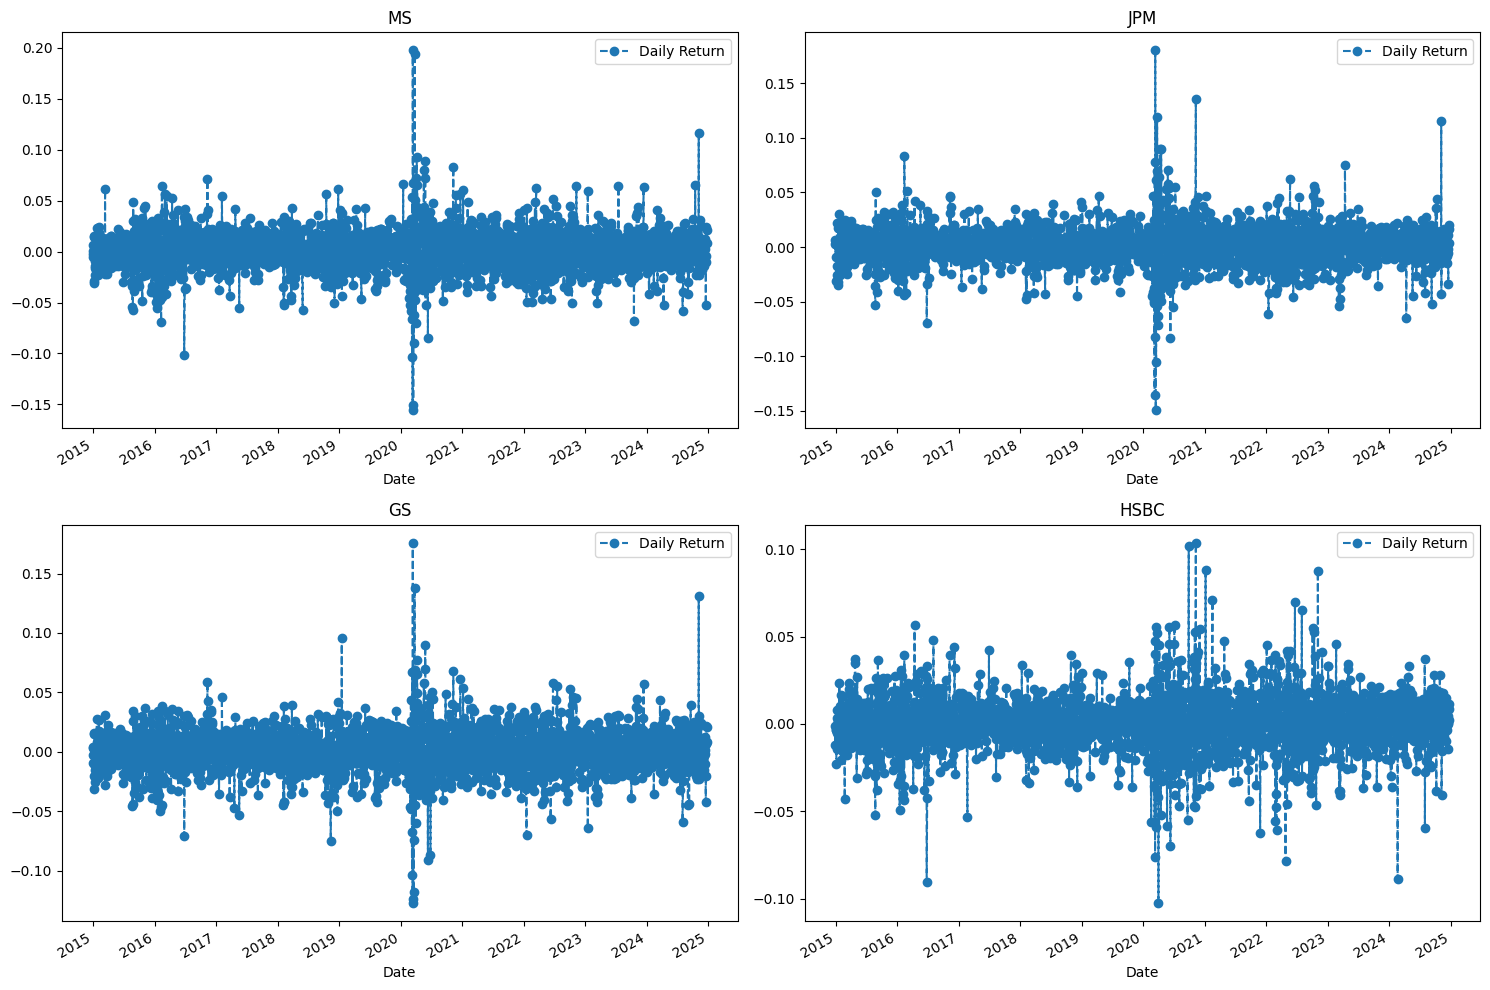

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in stock_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
# Plotting daily return percentages for each company
# Morgan Stanley (MS)
ms_hist['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MS')
# JPMorgan Chase (JPM)
jpm_hist['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPM')
# Goldman Sachs (GS)
gs_hist['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GS')
# HSBC Holdings (HSBC)
hsbc_hist['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HSBC')

fig.tight_layout() # Automatically adjusts spacing between subplots

In [ ]:
ms_hist['Daily Return']

,Daily Return
Date,
2014-12-26 00:00:00-05:00,NaN
2014-12-29 00:00:00-05:00,0.006199
2014-12-30 00:00:00-05:00,0.001027
2014-12-31 00:00:00-05:00,-0.005129
2015-01-02 00:00:00-05:00,-0.002319
...,...
2024-12-18 00:00:00-05:00,-0.052450
2024-12-19 00:00:00-05:00,-0.004461
2024-12-20 00:00:00-05:00,0.024398


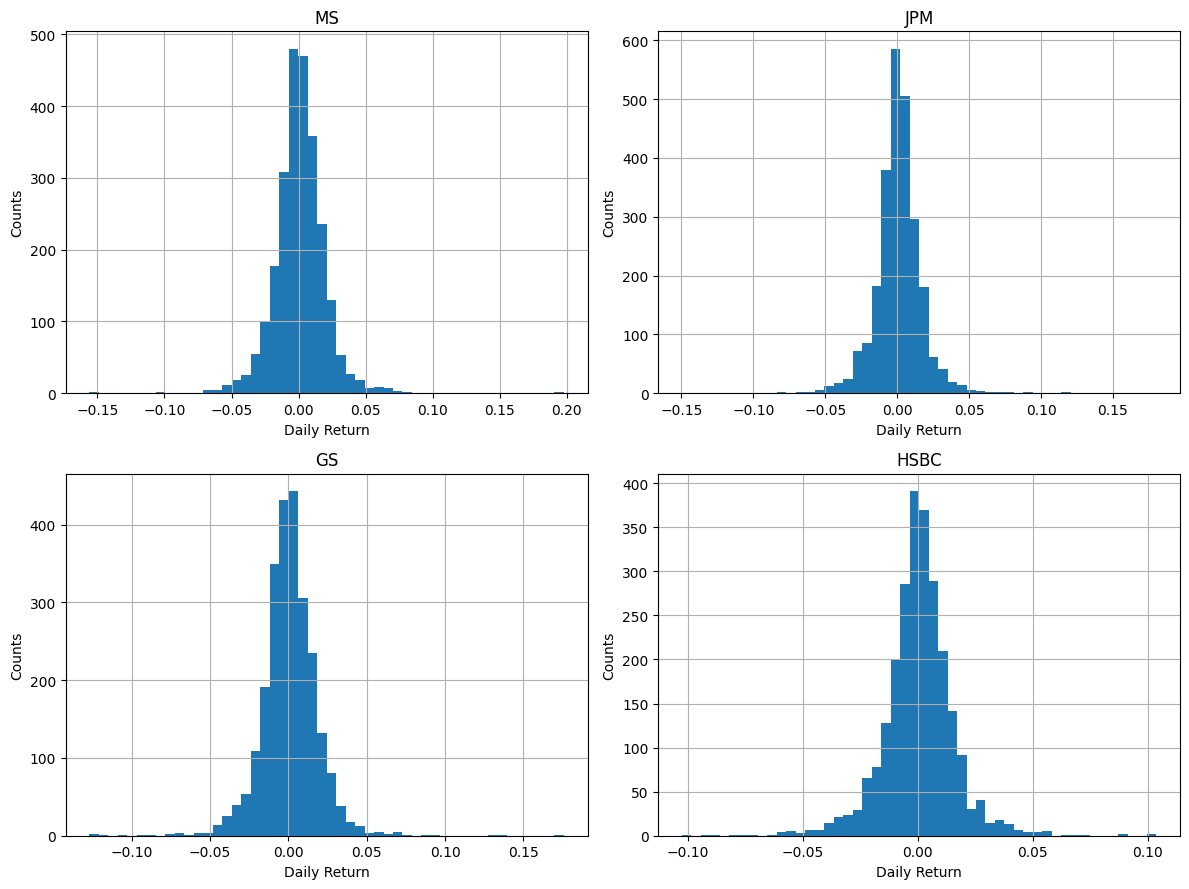

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(stock_list, 1):

    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    company['Daily Return'].hist(bins=50)  # Creates a histogram with 50 bins for the 'Daily Return'

    # Adding labels and title for the histogram
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{name_list[i - 1]}')


plt.tight_layout()  # Automatically adjusts spacing between subplots


In [ ]:
ms_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # Sequential: Allows building a linear stack of layers for the neural network
from keras.callbacks import EarlyStopping # EarlyStopping: Stops training when the model performance stops improving, to prevent overfitting
# LSTM: Long Short-Term Memory layers for handling sequential data
# Dense: Fully connected layers in the neural network
# Dropout: Regularization technique to prevent overfitting by randomly setting some outputs to zero
# BatchNormalization: Normalizes inputs in the network to stabilize and speed up training
# GRU: Gated Recurrent Unit layers, a simpler alternative to LSTM for sequential data
from keras.layers import LSTM,Dense,Dropout,BatchNormalization,GRU
from tensorflow.keras import layers # TensorFlow layers for additional layer customization
# mean_absolute_error: Measures the average magnitude of prediction errors
# mean_squared_error: Measures the average squared differences between predictions and actual values
# r2_score: Indicates how well the predictions fit the actual data, with a value between 0 and 1
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression # Importing the LinearRegression class from scikit-learn

In [ ]:
def forecast_future(model, days, x_test, sequence_length=20):
    # Start with the last available sequence
    recent_sequence = x_test[-sequence_length:, :]  # Ensure the correct slicing
    close_prices = x_test[:, 0].flatten().tolist()
    predictions = []
    #print(recent_sequence)
    for _ in range(days):
        # Reshape recent_sequence to match model's input requirements
      # Shape: (1, sequence_length, num_features)

      # Predict the next value
        next_pred = model.predict(recent_sequence)[0, 0]  # Extract the predicted value
        predictions.append(next_pred)

        # Update Close prices with the predicted value
        close_prices.append(float(next_pred))

        # Calculate moving averages using the updated Close prices
        ma10 = np.mean(close_prices[-10:]) if len(close_prices) >= 10 else np.mean(close_prices)
        ma20 = np.mean(close_prices[-20:]) if len(close_prices) >= 20 else np.mean(close_prices)

        # Construct the next_features based on the moving averages
        next_features = np.array([ma10, ma20]).reshape(1, -1)  # Shape: (1, 3)

        # Reshape next_features to align with recent_sequence structure
        next_features = np.repeat(next_features, 60, axis=0).reshape(1, 60, 2)  # Shape: (1, 60, 2)

        # Concatenate to update recent_sequence
        recent_sequence = np.concatenate([recent_sequence[1:], next_features], axis=0)  # Along time axis

    return predictions

In [ ]:
def forecast_future_linear_regression(model, days, x_test):
    # Start with the last available input feature set
    recent_features = x_test[-1, :]  # Take the last feature set
    close_prices = x_test[:, 0].flatten().tolist()  # Extract the "Close" prices from x_test
    predictions = []

    for _ in range(days):
        # Predict the next value using the recent features
        next_pred = model.predict(recent_features.reshape(1, -1))[0]  # Linear regression prediction
        predictions.append(next_pred)

        # Update close prices with the predicted value
        close_prices.append(float(next_pred))

        # Recalculate moving averages based on updated close prices
        ma10 = np.mean(close_prices[-10:]) if len(close_prices) >= 10 else np.mean(close_prices)
        ma20 = np.mean(close_prices[-20:]) if len(close_prices) >= 20 else np.mean(close_prices)

        # Construct the next feature set based on the moving averages
        recent_features = np.array([ma10, ma20])  # Update recent features with recalculated moving averages

    return predictions

In [ ]:
def model_training_and_metrics(data, name):
  data['Date'] = data.index
  dataset = data[['Close','MA for 10 days', 'MA for 20 days','Date']] # Extracting 'Close', 'MA for 50 days', 'Daily Return' prices
  model_data = pd.DataFrame(dataset)
  model_data = model_data.dropna() # Removing rows with missing values
  model_data = model_data.values # Extracting values as a NumPy array for machine learning models
  train_size = int(len(model_data)*.8) # Calculating the size of the training set as 80% of the total data
  test_size = len(ms_hist)-train_size # Calculating the size of the test set as the remaining 20% of the data

  print("Train Size :",train_size,"Test Size :",test_size)
  timestep = 60
  test_data = model_data[train_size-timestep:,:]  # Selecting data from `train_size - timestep` to the end of the dataset for testing
  test_date_or = test_data[:, -1:]
  model_data = model_data[:,:-1]
  scaler = StandardScaler()  # Creates an instance of StandardScaler to standardize the dataset
  model_data = scaler.fit_transform(model_data)  # Applying the StandardScaler to the dataset

  train_data = model_data[:train_size,:] # Selecting the first `train_size` rows of the dataset for training
  test_data = model_data[train_size-timestep:,:]  # Selecting data from `train_size - timestep` to the end of the dataset for testing

  sequence_length = 60
  x_train = []
  y_train = []
  # Creating input and output sequences for the training dataset
  for i in range(len(train_data)-timestep):
    x_train.append(train_data[i:i + sequence_length, 1:]) # Appending a sequence of `timestep` rows (input features) to x_train
    y_train.append(train_data[i + sequence_length, 0]) # Appending the target value (next value after the sequence) to y_train

  # Converting the lists into NumPy arrays for compatibility with machine learning models
  x_train,y_train = np.array(x_train),np.array(y_train)

  x_test = []
  y_test = []
  # Creating input and output sequences for the training dataset
  for i in range(len(test_data)-timestep):
    x_test.append(test_data[i:i + sequence_length, 1:]) # Appending a sequence of `timestep` rows (input features) to x_test
    y_test.append(test_data[i + sequence_length, 0]) # Appending the target value (next value after the sequence) to y_test

  # Converting the lists into NumPy arrays for compatibility with machine learning models
  x_test, y_test = np.array(x_test), np.array(y_test)

  # Defining the model using the Sequential API
  model = Sequential([
    # Adding a GRU layer with 150 units
    GRU(150, return_sequences= False, input_shape= (x_train.shape[1], 2)), # GRU processes sequential data; input shape indicates sequence length and features
                                                                            # `return_sequences=False` outputs the final hidden state, not the sequence
    Dropout(0.4), # Adding a Dropout layer to prevent overfitting by randomly setting 40% of the neurons to zero
    Dense(64),  # Adding a Dense layer with 64 neurons
    Dropout(0.2),  # Adding another Dropout layer to prevent overfitting, this time with a 20% dropout rate
    Dense(1)   # Adding the final Dense layer with 1 neuron for the output
  ])
  # Compiling the model
  model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mean_absolute_error','r2_score','root_mean_squared_error']) # Using the Adam optimizer for adaptive learning rates

  print("Model Summary GRU:")
  model.summary()

  callbacks = [
    EarlyStopping(
        monitor='loss',  # Monitors the training loss during training
        patience=10,  # Stops training if the loss does not improve for 10 consecutive epochs
        restore_best_weights=True  # Restores the weights of the best-performing epoch
    )
  ]
  history = model.fit(
    x_train,  # Input data (training sequences)
    y_train,  # Target values corresponding to the input sequences
    epochs=25,  # Number of epochs to train the model
    batch_size=16,  # Number of samples per gradient update
    callbacks=callbacks  # List of callbacks to monitor and control training
  )

  predicted_prices = model.predict(x_test) # Making predictions on the test dataset

  predicted_prices = predicted_prices.reshape(-1, 1) # Reshaping the predictions into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = predicted_prices.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
  predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

  original_prices = y_test.reshape(-1, 1) # Reshaping the predictions into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = original_prices.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  original_full = np.concatenate((dummy_features, original_prices), axis=1)  # Concatenating dummy features with the original prices
  original_prices_inversed = scaler.inverse_transform(original_full)[:, -1]  # Applying the inverse transformation to convert scaled prices back to the original scale

  r2_gru = r2_score(original_prices_inversed, predicted_prices_inversed)

  print("\n")
  print("Evaluation Metrics for GRU Model:\n")
  print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed, predicted_prices_inversed)}") # MAE measures the average magnitude of errors between predicted and actual values
  print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed, predicted_prices_inversed)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
  print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed, predicted_prices_inversed))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
  print(f"R2 Score: {r2_score(original_prices_inversed, predicted_prices_inversed)}") # R2 indicates the proportion of variance in the target variable explained by the model

  test_date = test_date_or[60:,:]

  #plot original vs predicted
  plt.figure(figsize=(10,6))
  plt.plot(test_date.flatten(), original_prices_inversed, label = 'original') # Plots the actual prices
  plt.plot(test_date.flatten(), predicted_prices_inversed, label = 'predicted') # Plots the model's predictions
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
  plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
  plt.title(f'Original VS GRU predicted Price for {name}')
  plt.legend() # Adding a legend to differentiate between the original and predicted prices
  plt.show()

  Model_lstm = Sequential() # Defining an LSTM-based sequential model
  Model_lstm.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1],2))) # Adding the first LSTM layer with 100 units
  Model_lstm.add(Dropout(0.2))  # 20% of neurons are randomly deactivated during training
  Model_lstm.add(LSTM(units = 100, return_sequences = True)) # Adding a second LSTM layer with 100 units
  Model_lstm.add(Dropout(0.2)) # Adding another Dropout layer
  Model_lstm.add(LSTM(units = 100, return_sequences = True)) # Adding a third LSTM layer with 100 units
  Model_lstm.add(Dropout(0.2))  # Adding another Dropout layer
  Model_lstm.add(layers.LSTM(units = 100, return_sequences = False)) # Adding the final LSTM layer
  Model_lstm.add(layers.Dropout(rate = 0.2)) # Adding a Dropout layer for regularization
  Model_lstm.add(layers.Dense(units = 25)) # Reduces the dimensionality before the final output layer
  Model_lstm.add(layers.Dense(units = 1)) # Adding another Dense layer with 1 unit (for output)
  Model_lstm.add(Dense(units = 1)) # Adding a duplicate Dense layer with 1 unit (likely redundant)
  print("\n")
  print("Model Summary LSTM:")
  Model_lstm.summary() # Printing the model summary

  # Compiling the model
  Model_lstm.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['mean_absolute_error','r2_score','root_mean_squared_error'])  # Using the Adam optimizer for adaptive learning rates

  history_lstm = Model_lstm.fit(
    x_train,  # Training input data (sequences)
    y_train,  # Target output values corresponding to the sequences
    epochs=15,  # Number of complete passes through the training dataset
    batch_size=16  # Number of samples per gradient update
  )

  predicted_prices = Model_lstm.predict(x_test) # Making predictions on the test dataset

  predicted_prices = predicted_prices.reshape(-1, 1) # Reshaping the predictions into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = predicted_prices.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)  # Concatenating dummy features with the predicted prices
  predicted_prices_inversed_lstm = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale
  r2_lstm = r2_score(original_prices_inversed, predicted_prices_inversed_lstm)

  print("\n")
  print("Evaluation Metrics for LSTM Model:\n")
  print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed, predicted_prices_inversed_lstm)}") # MAE measures the average magnitude of errors between predicted and actual values
  print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed, predicted_prices_inversed_lstm)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
  print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed, predicted_prices_inversed_lstm))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
  print(f"R2 Score: {r2_score(original_prices_inversed, predicted_prices_inversed_lstm)}") # R2 indicates the proportion of variance in the target variable explained by the model

  #plot original vs predicted
  plt.figure(figsize=(10,6))
  plt.plot(test_date.flatten(), original_prices_inversed, label = 'original') # Plots the actual prices
  plt.plot(test_date.flatten(), predicted_prices_inversed_lstm, label = 'predicted') # Plots the model's predictions
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
  plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
  plt.title(f'Original VS LSTM predicted Price for {name}')
  plt.legend() # Adding a legend to differentiate between the original and predicted prices
  plt.show()

  x_train_ln = train_data[:,1:] # Selecting all rows and columns starting from the second column onward
  y_train_ln = train_data[:,0] # Selecting all rows and the first column as the target

  x_test_ln = test_data[:,1:] # Selecting all rows and columns starting from the second column onward
  y_test_ln = test_data[:,0] # Selecting all rows and the first column as the target

  lm=LinearRegression() # Creating an instance of the LinearRegression model
  lm.fit(x_train_ln,y_train_ln) # Fitting the linear regression model to the training data

  predictions_ln = lm.predict(x_test_ln) # Making predictions on the test dataset

  predicted_prices = predictions_ln.reshape(-1, 1) # Reshaping predicted prices into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = predicted_prices.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
  predicted_prices_inversed_ln = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

  original_prices_ln = y_test_ln.reshape(-1, 1) # Reshaping predicted prices into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = original_prices_ln.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  original_full = np.concatenate((dummy_features, original_prices_ln), axis=1) # Concatenating dummy features with the predicted prices
  original_prices_inversed_ln = scaler.inverse_transform(original_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

  print("\n")
  print("Evaluation Metrics for Linear Regression Model:\n")
  print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # MAE measures the average magnitude of errors between predicted and actual values
  print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
  print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed_ln, predicted_prices_inversed_ln))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
  print(f"R2 Score: {r2_score(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # R2 indicates the proportion of variance in the target variable explained by the model

  #plot original vs predicted
  plt.figure(figsize=(10,6))
  plt.plot(test_date_or,original_prices_inversed_ln, label = 'original') # Plots the actual prices
  plt.plot(test_date_or,predicted_prices_inversed_ln, label = 'predicted') # Plots the model's predictions
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
  plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
  plt.title(f'Original VS Linear Regression predicted Price for {name}')
  plt.legend()  # Adding a legend to differentiate between the original and predicted prices
  plt.show()


  if r2_gru > r2_lstm:
    model_pred = model
  else:
    model_pred = Model_lstm

  future_predictions = forecast_future(model_pred, days=30, x_test=x_test)

  future_predictions = np.array(future_predictions)
  predicted_prices = future_predictions.reshape(-1, 1) # Reshaping the predictions into a column vector
  # Preparing dummy features for inverse scaling
  num_samples = predicted_prices.shape[0]
  dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
  predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
  predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

  # Plot future predictions
  plt.figure(figsize=(10, 6))
  plt.plot(predicted_prices_inversed, label='Forecasted Prices', linestyle='--')
  plt.title(f"Future Predictions for {name}")
  plt.xlabel("Future Days")
  plt.ylabel("Price")
  plt.legend()
  plt.show()


Train Size : 1997 Test Size : 519
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.1546 - mean_absolute_error: 0.2596 - r2_score: 0.7542 - root_mean_squared_error: 0.3597
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0194 - mean_absolute_error: 0.1059 - r2_score: 0.9674 - root_mean_squared_error: 0.1394
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0181 - mean_absolute_error: 0.1025 - r2_score: 0.9716 - root_mean_squared_error: 0.1344
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0179 - mean_absolute_error: 0.1013 - r2_score: 0.9722 - root_mean_squared_error: 0.1337
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0145 - mean_absolute_error: 0.0901 - r2_score: 0.9768 - root_mean_squared_error: 0.1204
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0141 - mean_absolute_error: 0.0893 - r2_score: 0.9764 - root_mean_squared_error: 0.1186
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0133 - mean_absolute_error:

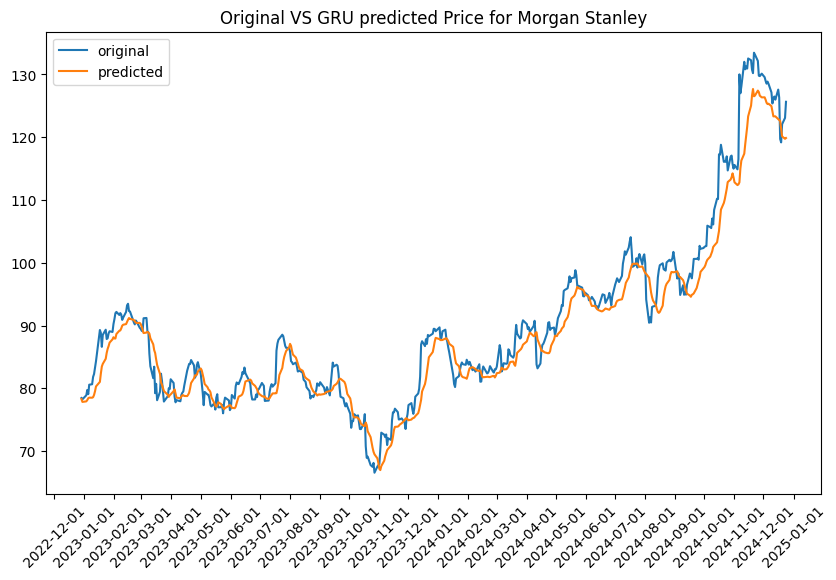



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 31s 176ms/step - loss: 0.0918 - mean_absolute_error: 0.2026 - r2_score: 0.8496 - root_mean_squared_error: 0.2803
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - loss: 0.0222 - mean_absolute_error: 0.1115 - r2_score: 0.9641 - root_mean_squared_error: 0.1490
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 0.0234 - mean_absolute_error: 0.1139 - r2_score: 0.9610 - root_mean_squared_error: 0.1529
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - loss: 0.0209 - mean_absolute_error: 0.1111 - r2_score: 0.9671 - root_mean_squared_error: 0.1444
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - loss: 0.0204 - mean_absolute_error: 0.1083 - r2_score: 0.9669 - root_mean_squared_error: 0.1426
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - loss: 0.0155 - mean_absolute_error: 0.0925 - r2_score: 0.9751 - root_mean_squared_error: 0.1245
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 42s 182ms/step - loss: 0.0182 - mean_absol

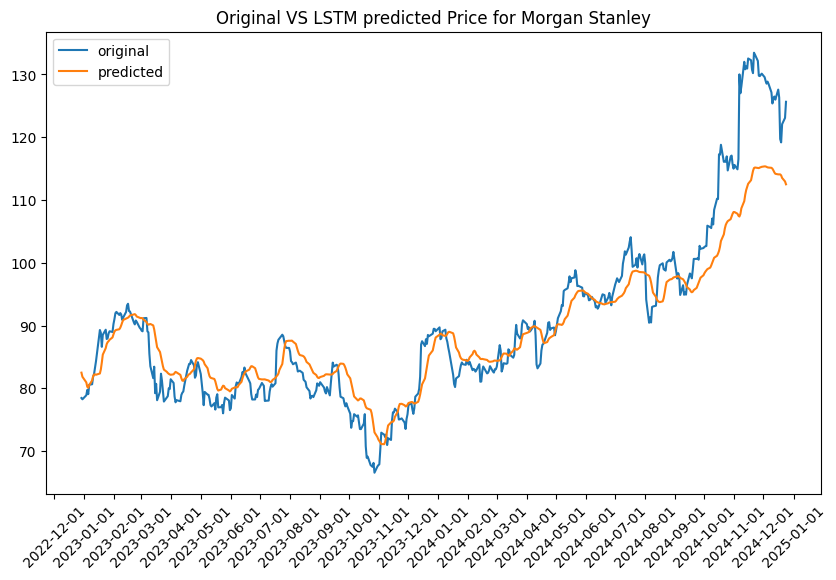



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 1.8676025416133655
Mean Squared Error: 5.999129015861171
Root Mean Squared Error: 2.449311947437723
R2 Score: 0.9694140090792269


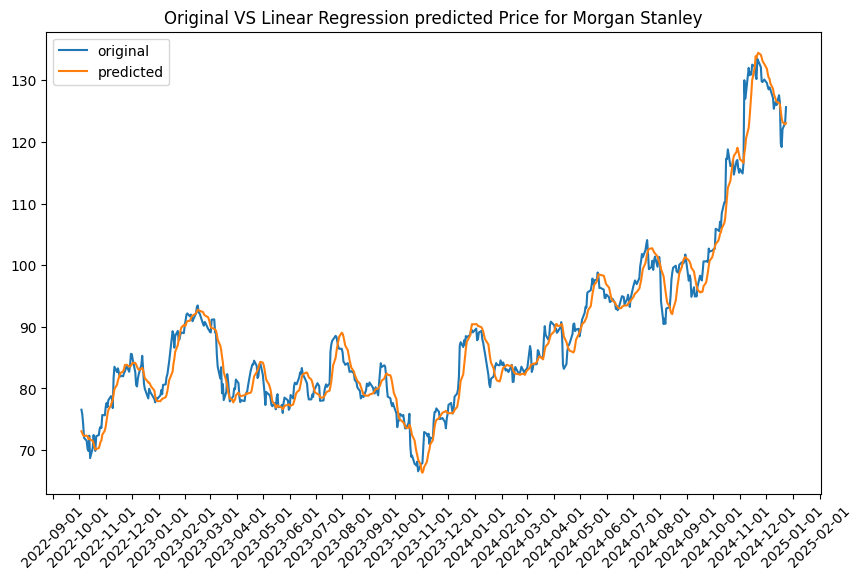

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

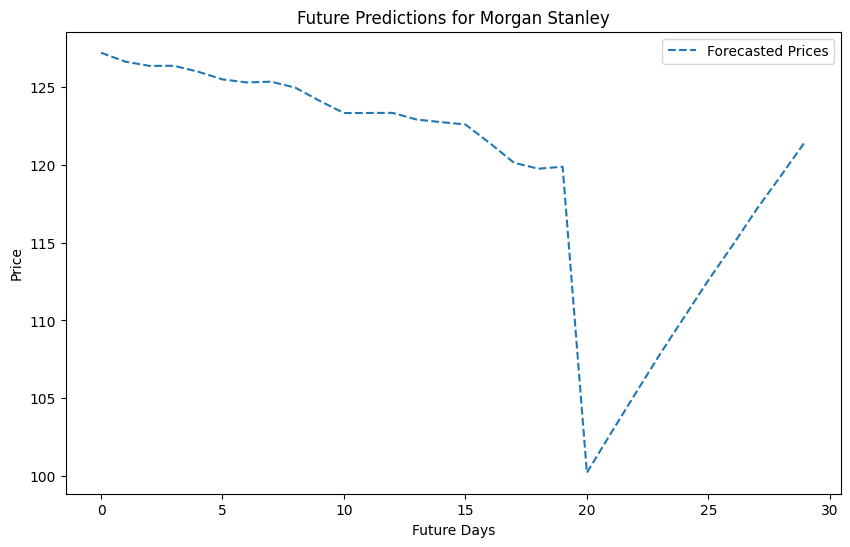

In [ ]:
model_training_and_metrics(ms_hist, 'Morgan Stanley')

Train Size : 1997 Test Size : 519
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0535 - mean_absolute_error: 0.1581 - r2_score: 0.8825 - root_mean_squared_error: 0.2217
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0164 - mean_absolute_error: 0.0965 - r2_score: 0.9636 - root_mean_squared_error: 0.1279
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0141 - mean_absolute_error: 0.0902 - r2_score: 0.9684 - root_mean_squared_error: 0.1186
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0131 - mean_absolute_error: 0.0859 - r2_score: 0.9705 - root_mean_squared_error: 0.1145
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0131 - mean_absolute_error: 0.0868 - r2_score: 0.9718 - root_mean_squared_error: 0.1145
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0143 - mean_absolute_error: 0.0892 - r2_score: 0.9678 - root_mean_squared_error: 0.1193
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0121 - mean_absolute_error: 

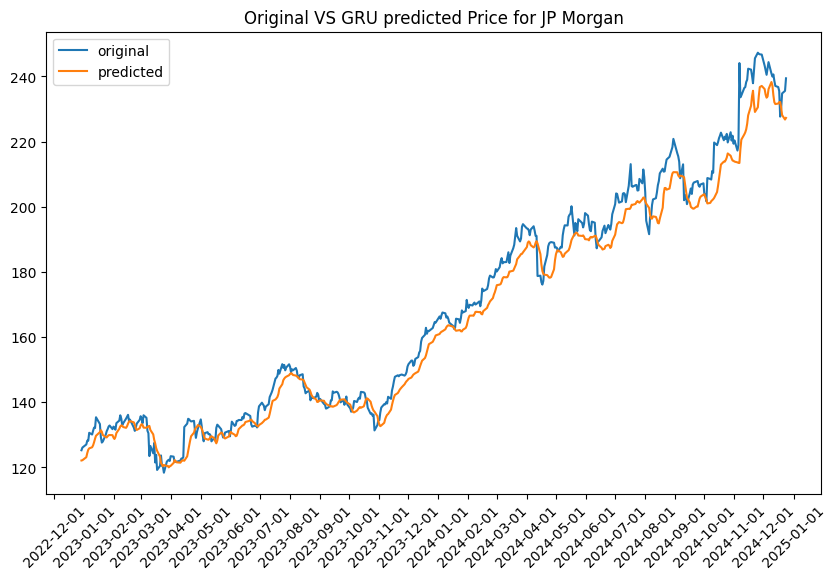



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_38 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - loss: 0.0833 - mean_absolute_error: 0.1927 - r2_score: 0.8163 - root_mean_squared_error: 0.2707
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - loss: 0.0228 - mean_absolute_error: 0.1121 - r2_score: 0.9452 - root_mean_squared_error: 0.1505
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0211 - mean_absolute_error: 0.1084 - r2_score: 0.9531 - root_mean_squared_error: 0.1453
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - loss: 0.0191 - mean_absolute_error: 0.1024 - r2_score: 0.9555 - root_mean_squared_error: 0.1380
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - loss: 0.0188 - mean_absolute_error: 0.1022 - r2_score: 0.9578 - root_mean_squared_error: 0.1371
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - loss: 0.0165 - mean_absolute_error: 0.0937 - r2_score: 0.9634 - root_mean_squared_error: 0.1275
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - loss: 0.0152 - mean_absol

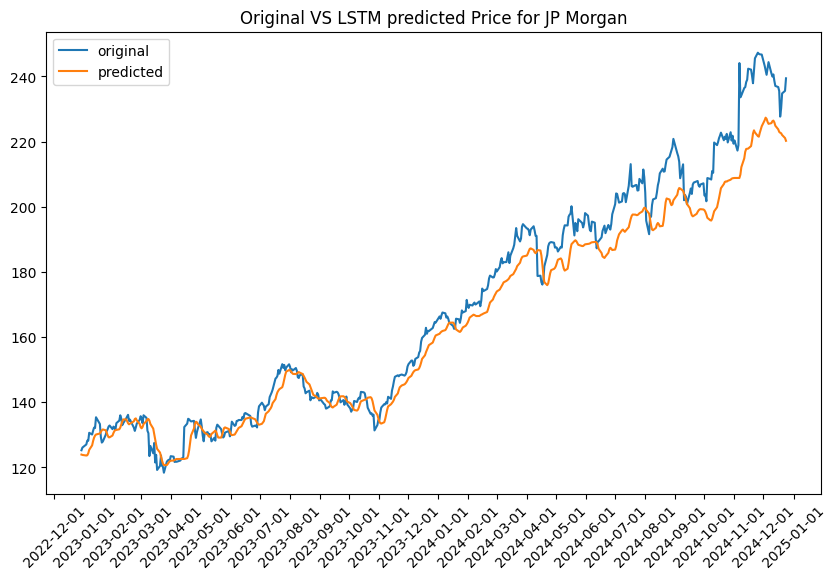



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 2.6967401976005787
Mean Squared Error: 13.050273737006835
Root Mean Squared Error: 3.612516261140818
R2 Score: 0.9905039874322329


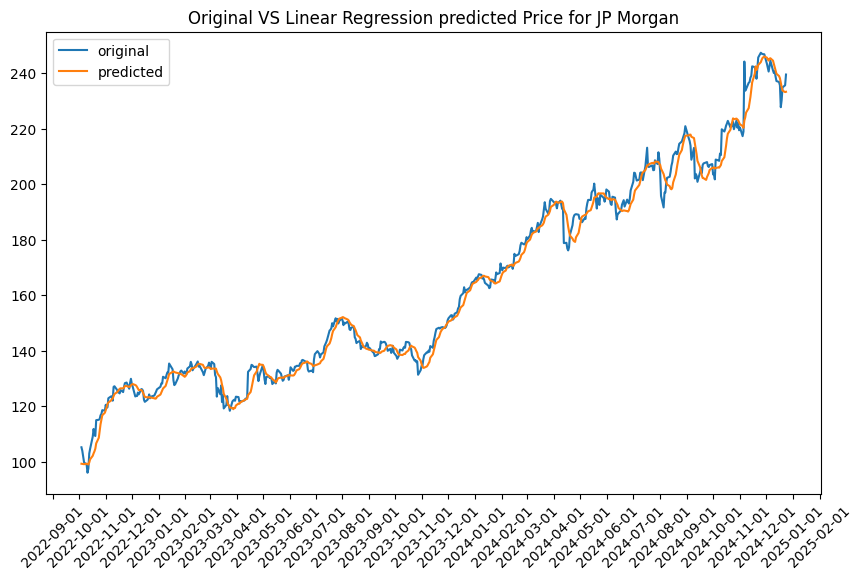

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

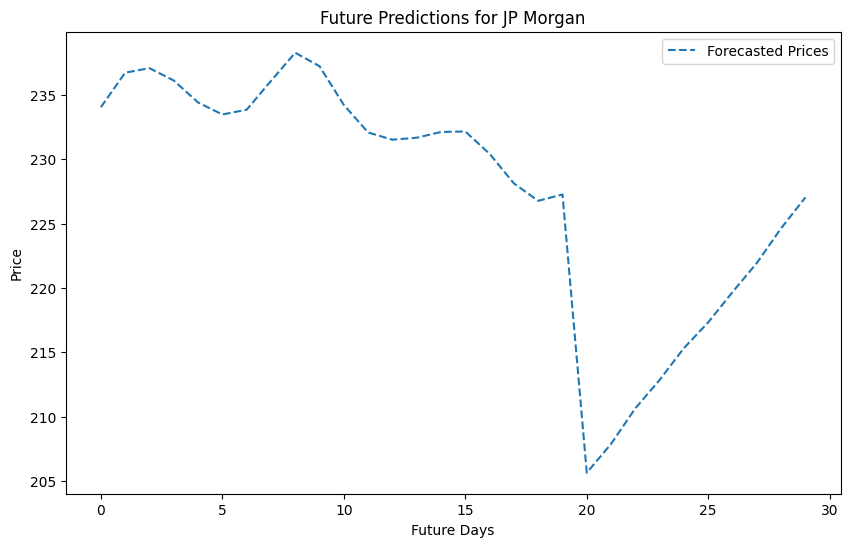

In [ ]:
model_training_and_metrics(jpm_hist, 'JP Morgan')

Train Size : 1997 Test Size : 519
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0941 - mean_absolute_error: 0.2119 - r2_score: 0.8082 - root_mean_squared_error: 0.2865
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0193 - mean_absolute_error: 0.1041 - r2_score: 0.9549 - root_mean_squared_error: 0.1390
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0149 - mean_absolute_error: 0.0943 - r2_score: 0.9678 - root_mean_squared_error: 0.1220
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0136 - mean_absolute_error: 0.0889 - r2_score: 0.9698 - root_mean_squared_error: 0.1164
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.0146 - mean_absolute_error: 0.0912 - r2_score: 0.9677 - root_mean_squared_error: 0.1210
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0142 - mean_absolute_error: 0.0894 - r2_score: 0.9682 - root_mean_squared_error: 0.1190
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0138 - mean_absolute_error: 

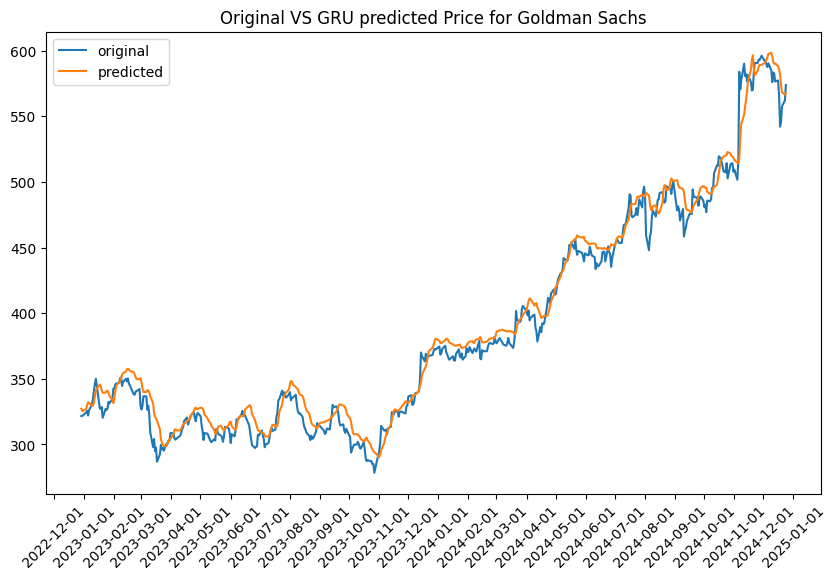

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




Model Summary LSTM:


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_41 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_42 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 31s 182ms/step - loss: 0.0917 - mean_absolute_error: 0.2159 - r2_score: 0.8108 - root_mean_squared_error: 0.2857
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - loss: 0.0242 - mean_absolute_error: 0.1175 - r2_score: 0.9470 - root_mean_squared_error: 0.1556
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - loss: 0.0227 - mean_absolute_error: 0.1146 - r2_score: 0.9523 - root_mean_squared_error: 0.1506
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 0.0185 - mean_absolute_error: 0.1028 - r2_score: 0.9591 - root_mean_squared_error: 0.1358
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 0.0176 - mean_absolute_error: 0.0999 - r2_score: 0.9623 - root_mean_squared_error: 0.1325
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - loss: 0.0185 - mean_absolute_error: 0.1055 - r2_score: 0.9572 - root_mean_squared_error: 0.1359
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - loss: 0.0153 - mean_absol

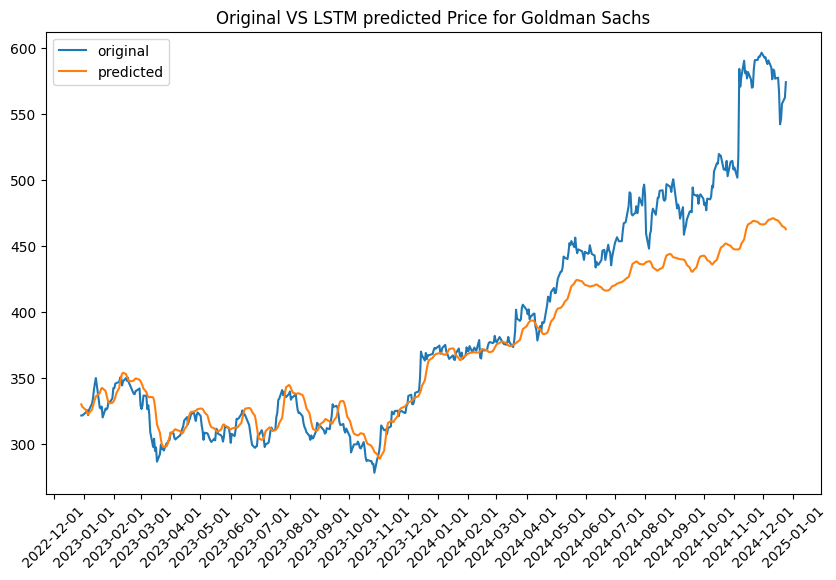



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 7.252099769954594
Mean Squared Error: 97.45137640931421
Root Mean Squared Error: 9.871746370795504
R2 Score: 0.9855917239576778


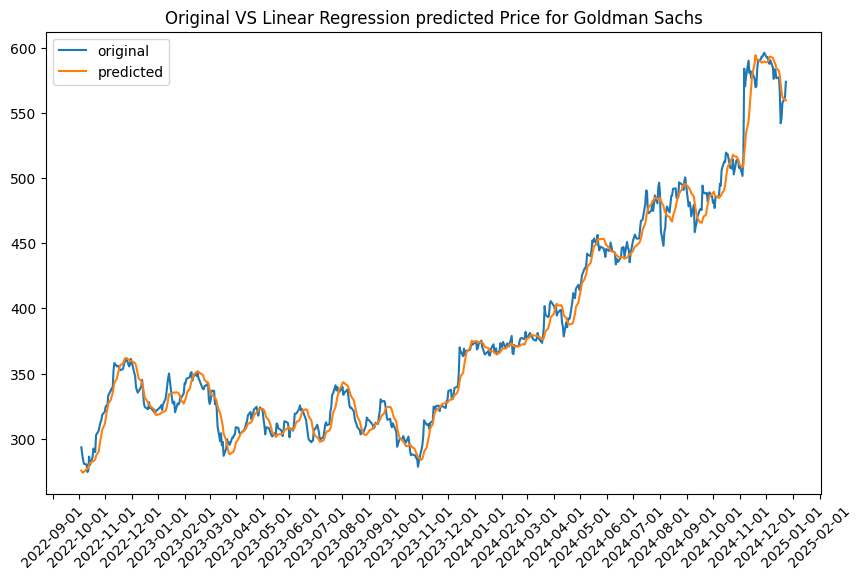

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

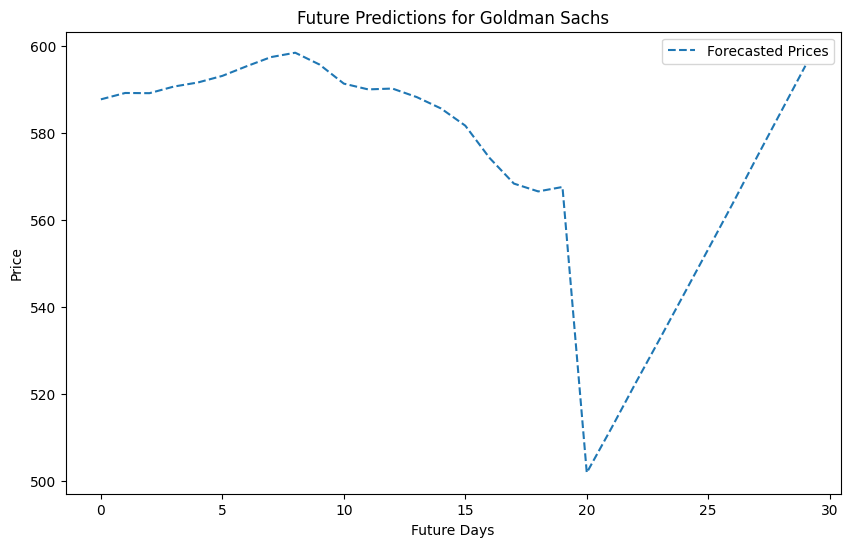

In [ ]:
model_training_and_metrics(gs_hist, 'Goldman Sachs')

Train Size : 1997 Test Size : 519
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.1324 - mean_absolute_error: 0.2485 - r2_score: 0.7338 - root_mean_squared_error: 0.3456
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0295 - mean_absolute_error: 0.1312 - r2_score: 0.9463 - root_mean_squared_error: 0.1717
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0251 - mean_absolute_error: 0.1198 - r2_score: 0.9511 - root_mean_squared_error: 0.1583
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0229 - mean_absolute_error: 0.1148 - r2_score: 0.9580 - root_mean_squared_error: 0.1514
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0219 - mean_absolute_error: 0.1131 - r2_score: 0.9577 - root_mean_squared_error: 0.1480
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0239 - mean_absolute_error: 0.1175 - r2_score: 0.9554 - root_mean_squared_error: 0.1544
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0197 - mean_absolute_error: 

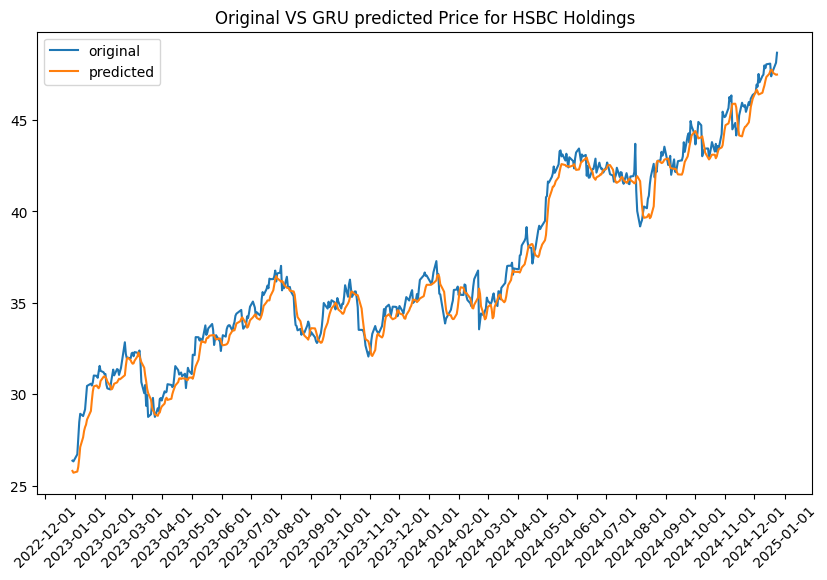



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - loss: 0.1114 - mean_absolute_error: 0.2432 - r2_score: 0.7838 - root_mean_squared_error: 0.3231
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - loss: 0.0420 - mean_absolute_error: 0.1587 - r2_score: 0.9229 - root_mean_squared_error: 0.2044
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - loss: 0.0373 - mean_absolute_error: 0.1481 - r2_score: 0.9299 - root_mean_squared_error: 0.1929
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - loss: 0.0319 - mean_absolute_error: 0.1376 - r2_score: 0.9404 - root_mean_squared_error: 0.1787
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - loss: 0.0323 - mean_absolute_error: 0.1374 - r2_score: 0.9359 - root_mean_squared_error: 0.1796
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - loss: 0.0271 - mean_absolute_error: 0.1273 - r2_score: 0.9495 - root_mean_squared_error: 0.1646
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - loss: 0.0314 - mean_absol

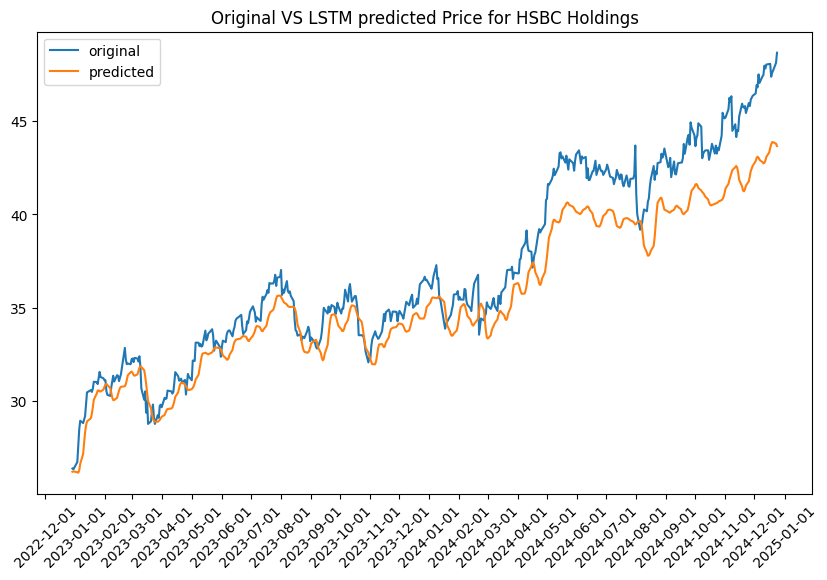



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 0.5569426431089283
Mean Squared Error: 0.4961817939780356
Root Mean Squared Error: 0.7044017276938179
R2 Score: 0.9874349927703162


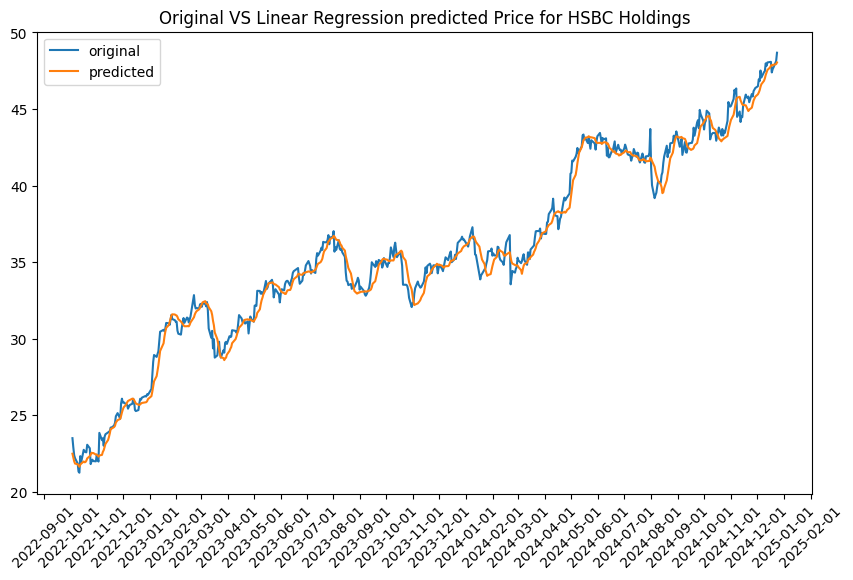

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

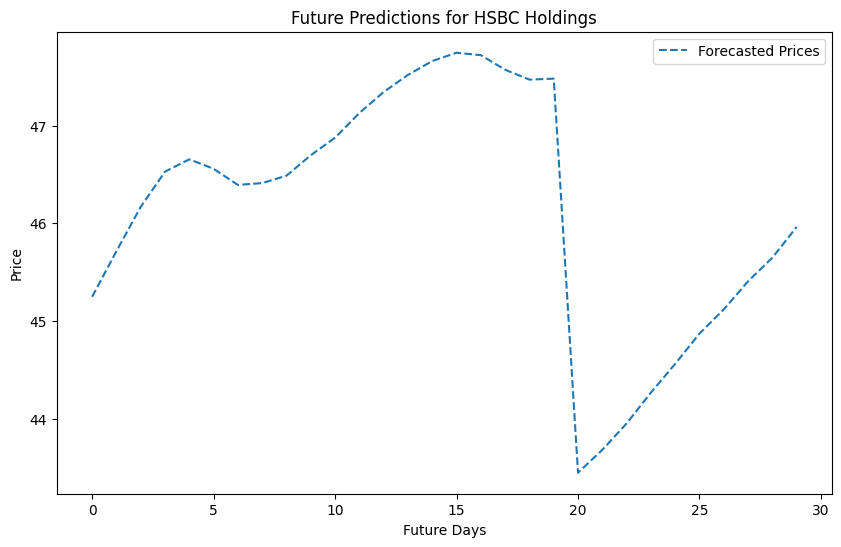

In [ ]:
model_training_and_metrics(hsbc_hist, 'HSBC Holdings')

In [ ]:
amzn = yf.Ticker("AMZN")  #  AMZN
amzn = amzn.history(period="10y")

In [ ]:
amzn.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-26 00:00:00-05:00,15.2500,15.5390,15.1905,15.4545,57876000,0.0,0.0
2014-12-29 00:00:00-05:00,15.3925,15.7135,15.3290,15.6020,60180000,0.0,0.0
2014-12-30 00:00:00-05:00,15.4955,15.6970,15.4670,15.5150,41860000,0.0,0.0
2014-12-31 00:00:00-05:00,15.5775,15.6490,15.5005,15.5175,40960000,0.0,0.0
2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000,0.0,0.0


In [ ]:
# Calculate and plot moving averages for each stock
ma_day = [10, 20, 50]

# Calculating moving averages for each company
for ma in ma_day:
    # Creating a new column name for the moving average
    column_name = f"MA for {ma} days"
    # Adding a column to calculate the moving average of the 'Close' price
    amzn[column_name] = amzn['Close'].rolling(ma).mean()

Train Size : 1998 Test Size : 518
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.2438 - mean_absolute_error: 0.2993 - r2_score: 0.7038 - root_mean_squared_error: 0.4502
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0238 - mean_absolute_error: 0.1162 - r2_score: 0.9710 - root_mean_squared_error: 0.1543
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0212 - mean_absolute_error: 0.1092 - r2_score: 0.9752 - root_mean_squared_error: 0.1453
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0195 - mean_absolute_error: 0.1063 - r2_score: 0.9755 - root_mean_squared_error: 0.1395
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0176 - mean_absolute_error: 0.0999 - r2_score: 0.9795 - root_mean_squared_error: 0.1327
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0184 - mean_absolute_error: 0.1015 - r2_score: 0.9780 - root_mean_squared_error: 0.1355
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0177 - mean_absolute_error:

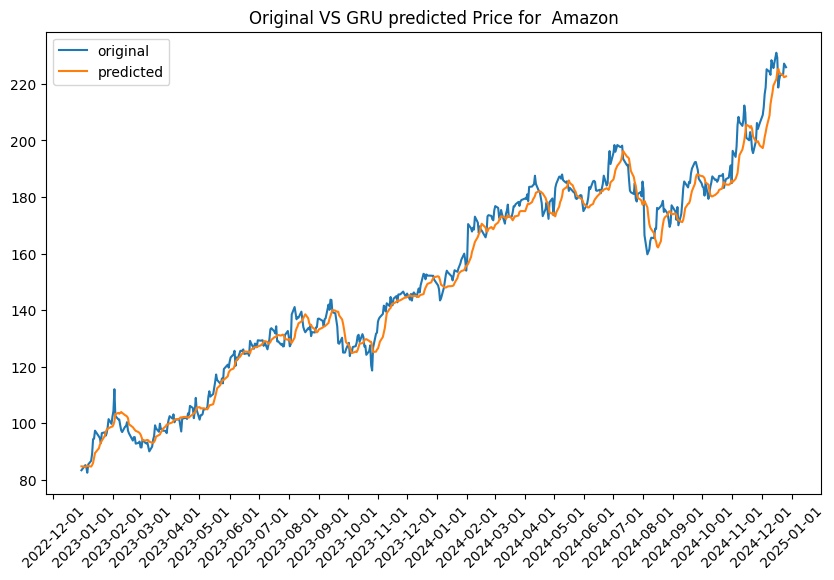



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_49 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - loss: 0.1520 - mean_absolute_error: 0.2701 - r2_score: 0.8150 - root_mean_squared_error: 0.3667
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - loss: 0.0260 - mean_absolute_error: 0.1169 - r2_score: 0.9683 - root_mean_squared_error: 0.1612
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - loss: 0.0256 - mean_absolute_error: 0.1191 - r2_score: 0.9699 - root_mean_squared_error: 0.1597
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 0.0222 - mean_absolute_error: 0.1128 - r2_score: 0.9738 - root_mean_squared_error: 0.1489
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 0.0186 - mean_absolute_error: 0.1020 - r2_score: 0.9776 - root_mean_squared_error: 0.1363
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0213 - mean_absolute_error: 0.1094 - r2_score: 0.9741 - root_mean_squared_error: 0.1455
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0184 - mean_absol

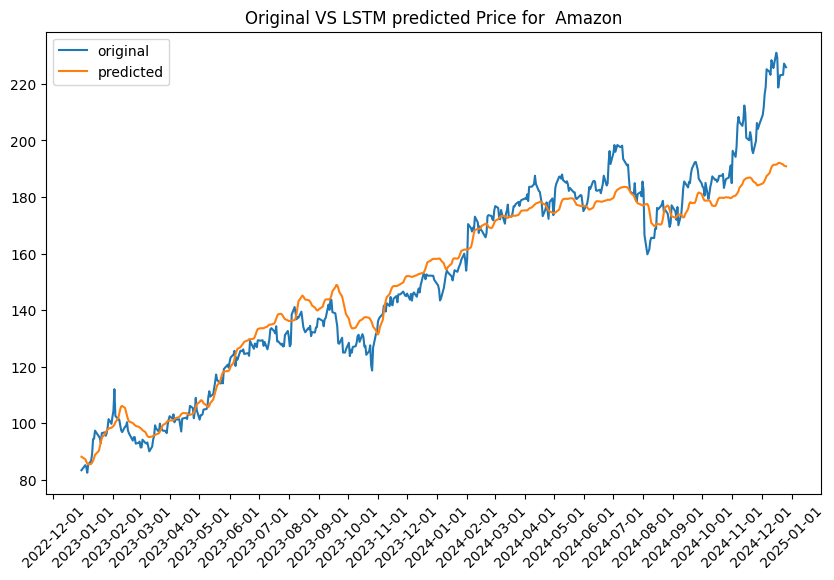



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 3.538616029024605
Mean Squared Error: 21.742347771105496
Root Mean Squared Error: 4.662869049319903
R2 Score: 0.9849678002976657


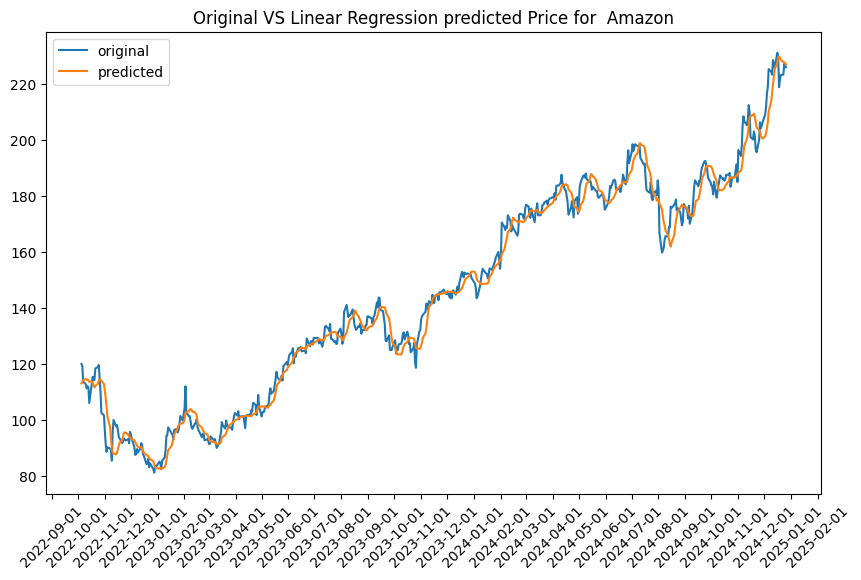

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

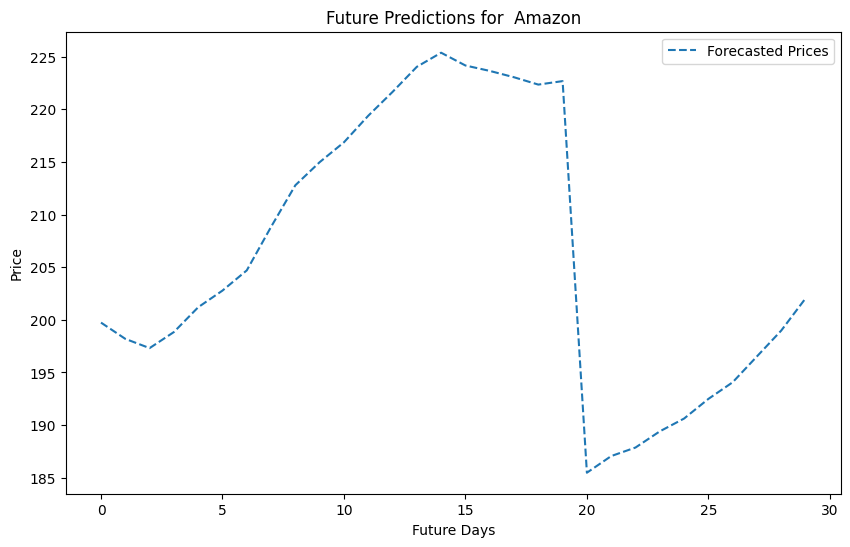

In [ ]:
model_training_and_metrics(amzn, 'Amazon')

In [ ]:
sbry = yf.Ticker("SBRY")
sbry = hsbc.history(period="10y")

In [ ]:
# Calculate and plot moving averages for each stock
ma_day = [10, 20, 50]

# Calculating moving averages for each company
for ma in ma_day:
    # Creating a new column name for the moving average
    column_name = f"MA for {ma} days"
    # Adding a column to calculate the moving average of the 'Close' price
    sbry[column_name] = sbry['Close'].rolling(ma).mean()

Train Size : 1998 Test Size : 518
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0658 - mean_absolute_error: 0.1830 - r2_score: 0.8733 - root_mean_squared_error: 0.2502
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0264 - mean_absolute_error: 0.1247 - r2_score: 0.9501 - root_mean_squared_error: 0.1624
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0249 - mean_absolute_error: 0.1187 - r2_score: 0.9547 - root_mean_squared_error: 0.1576
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0249 - mean_absolute_error: 0.1186 - r2_score: 0.9540 - root_mean_squared_error: 0.1577
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0198 - mean_absolute_error: 0.1062 - r2_score: 0.9614 - root_mean_squared_error: 0.1408
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0229 - mean_absolute_error: 0.1140 - r2_score: 0.9561 - root_mean_squared_error: 0.1512
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0203 - mean_absolute_error

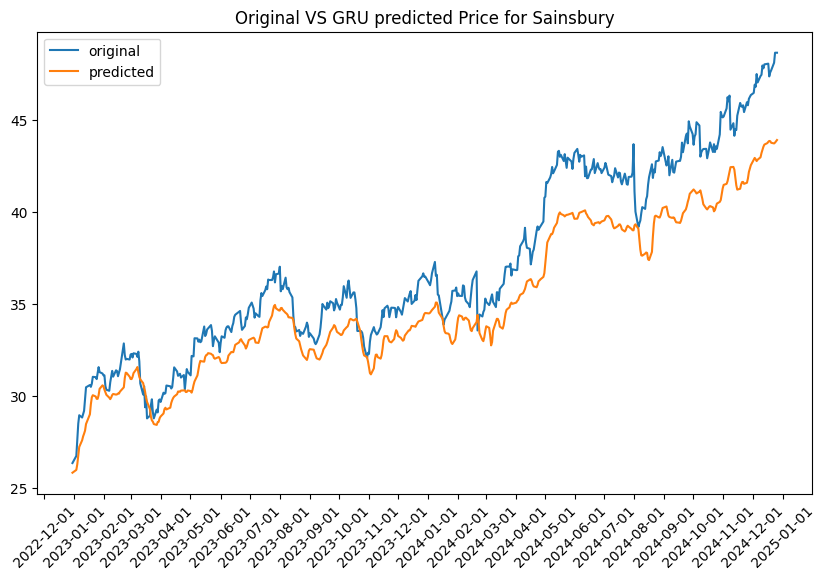



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_54 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_55 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - loss: 0.1380 - mean_absolute_error: 0.2663 - r2_score: 0.7466 - root_mean_squared_error: 0.3559
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - loss: 0.0374 - mean_absolute_error: 0.1494 - r2_score: 0.9303 - root_mean_squared_error: 0.1933
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 0.0319 - mean_absolute_error: 0.1387 - r2_score: 0.9416 - root_mean_squared_error: 0.1784
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - loss: 0.0314 - mean_absolute_error: 0.1367 - r2_score: 0.9405 - root_mean_squared_error: 0.1771
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - loss: 0.0261 - mean_absolute_error: 0.1255 - r2_score: 0.9502 - root_mean_squared_error: 0.1616
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - loss: 0.0248 - mean_absolute_error: 0.1203 - r2_score: 0.9505 - root_mean_squared_error: 0.1575
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - loss: 0.0229 - mean_absol

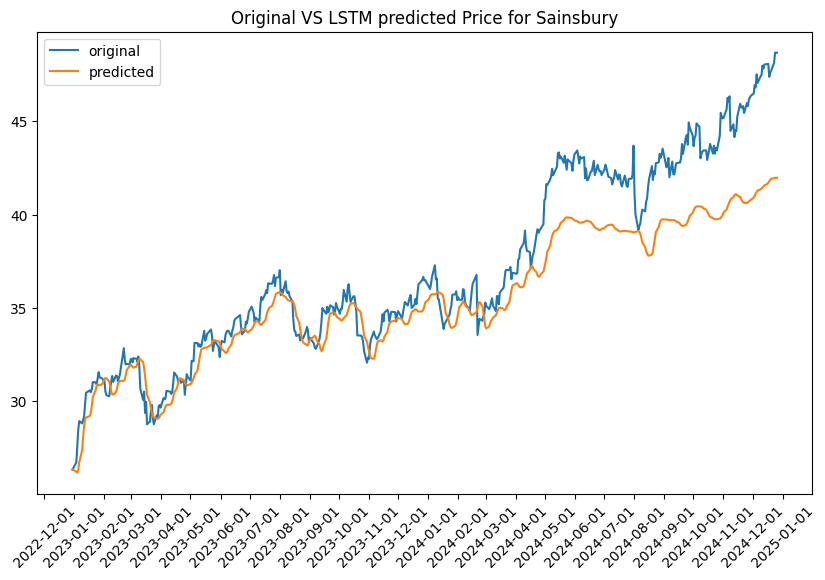



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 0.5560881472095167
Mean Squared Error: 0.4948000887788926
Root Mean Squared Error: 0.7034202789079176
R2 Score: 0.9874785317267267


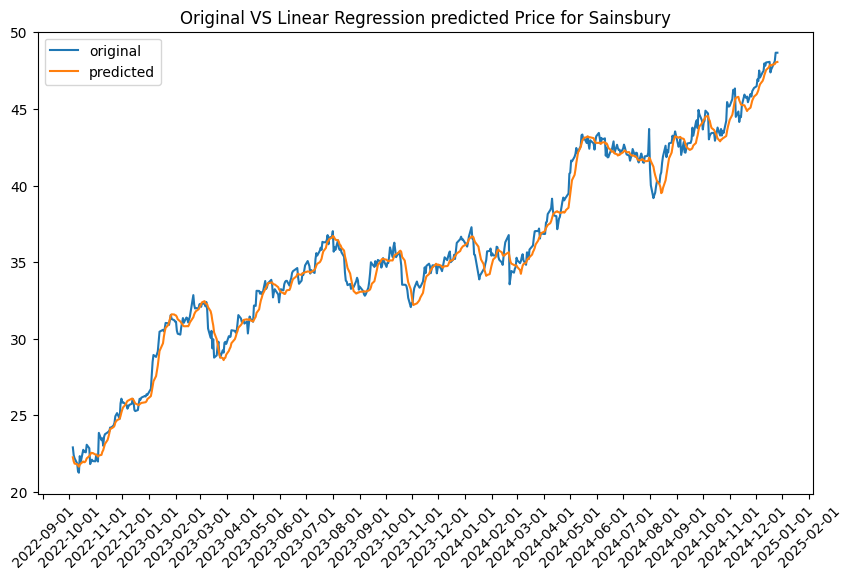

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━

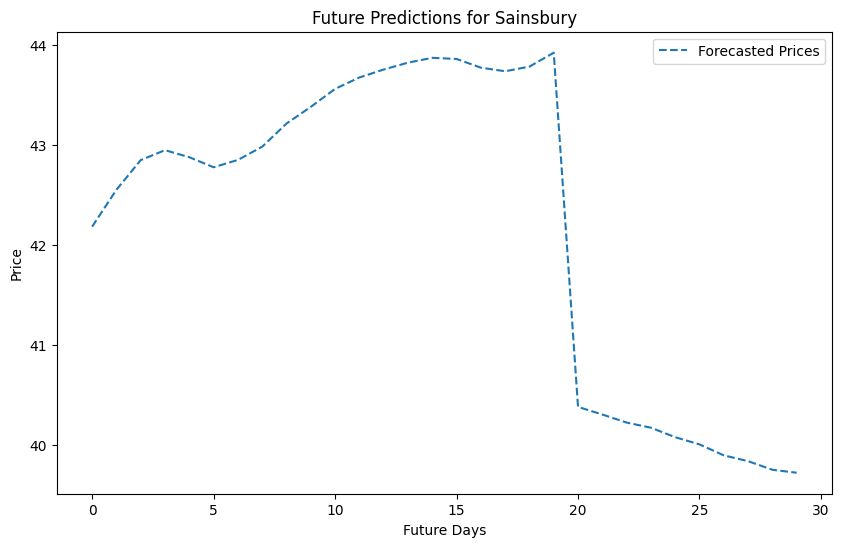

In [ ]:
model_training_and_metrics(sbry, 'Sainsbury')

In [ ]:
tsco = yf.Ticker("TSCO")
tsco = tsco.history(period="10y")

In [ ]:
# Calculate and plot moving averages for each stock
ma_day = [10, 20, 50]

# Calculating moving averages for each company
for ma in ma_day:
    # Creating a new column name for the moving average
    column_name = f"MA for {ma} days"
    # Adding a column to calculate the moving average of the 'Close' price
    tsco[column_name] = tsco['Close'].rolling(ma).mean()

Train Size : 1998 Test Size : 518
Model Summary GRU:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                         │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.0986 - mean_absolute_error: 0.2014 - r2_score: 0.7860 - root_mean_squared_error: 0.2859
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0160 - mean_absolute_error: 0.0981 - r2_score: 0.9663 - root_mean_squared_error: 0.1265
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0124 - mean_absolute_error: 0.0870 - r2_score: 0.9715 - root_mean_squared_error: 0.1112
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0112 - mean_absolute_error: 0.0813 - r2_score: 0.9755 - root_mean_squared_error: 0.1060
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0111 - mean_absolute_error: 0.0803 - r2_score: 0.9766 - root_mean_squared_error: 0.1052
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0109 - mean_absolute_error: 0.0808 - r2_score: 0.9761 - root_mean_squared_error: 0.1041
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0101 - mean_absolute_error: 

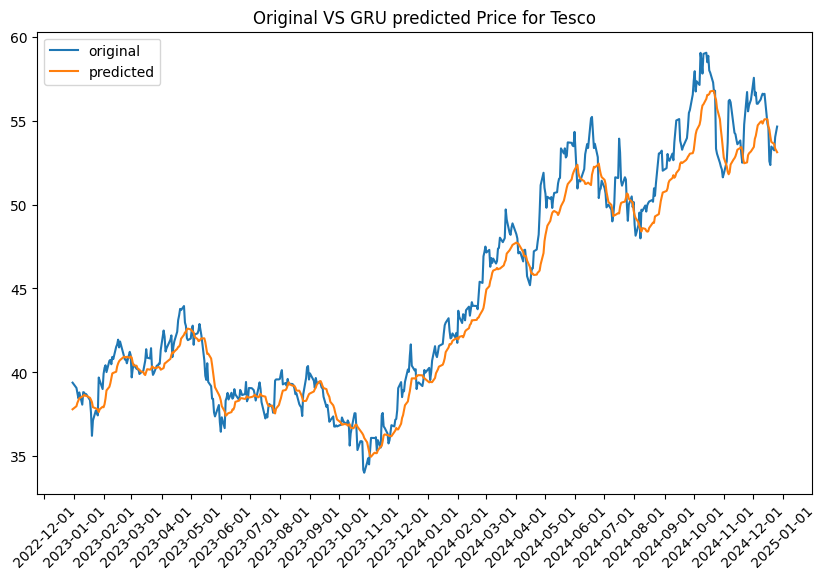



Model Summary LSTM:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_58 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_96 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_59 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - loss: 0.0818 - mean_absolute_error: 0.1966 - r2_score: 0.8082 - root_mean_squared_error: 0.2654
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - loss: 0.0145 - mean_absolute_error: 0.0921 - r2_score: 0.9669 - root_mean_squared_error: 0.1205
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - loss: 0.0152 - mean_absolute_error: 0.0937 - r2_score: 0.9681 - root_mean_squared_error: 0.1224
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - loss: 0.0115 - mean_absolute_error: 0.0816 - r2_score: 0.9747 - root_mean_squared_error: 0.1069
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - loss: 0.0102 - mean_absolute_error: 0.0767 - r2_score: 0.9769 - root_mean_squared_error: 0.1009
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - loss: 0.0102 - mean_absolute_error: 0.0786 - r2_score: 0.9781 - root_mean_squared_error: 0.1010
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - loss: 0.0101 - mean_absol

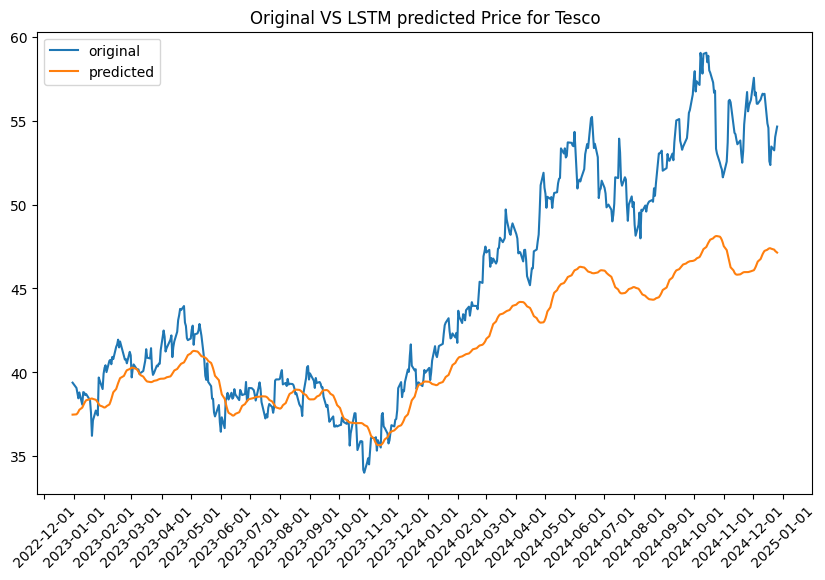



Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 0.8806025052561071
Mean Squared Error: 1.2986253853991898
Root Mean Squared Error: 1.1395724572835155
R2 Score: 0.9722372906095285


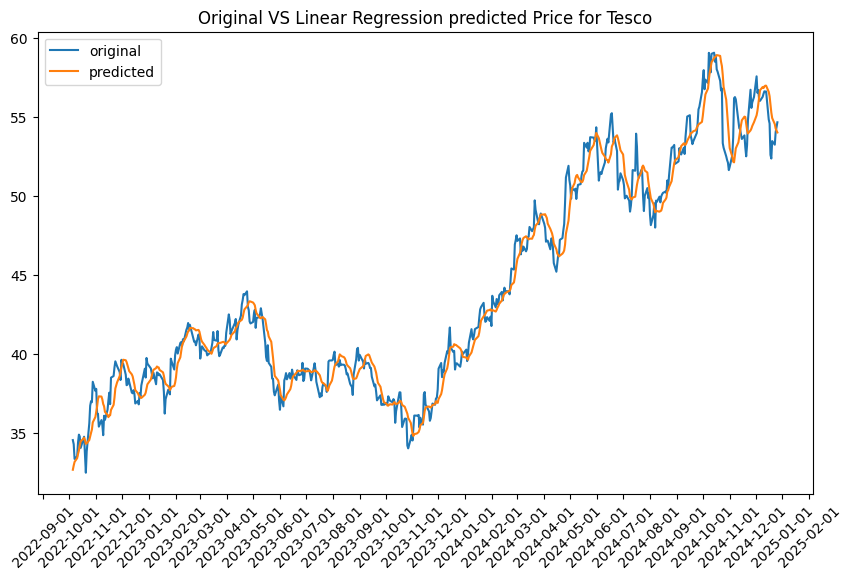

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━

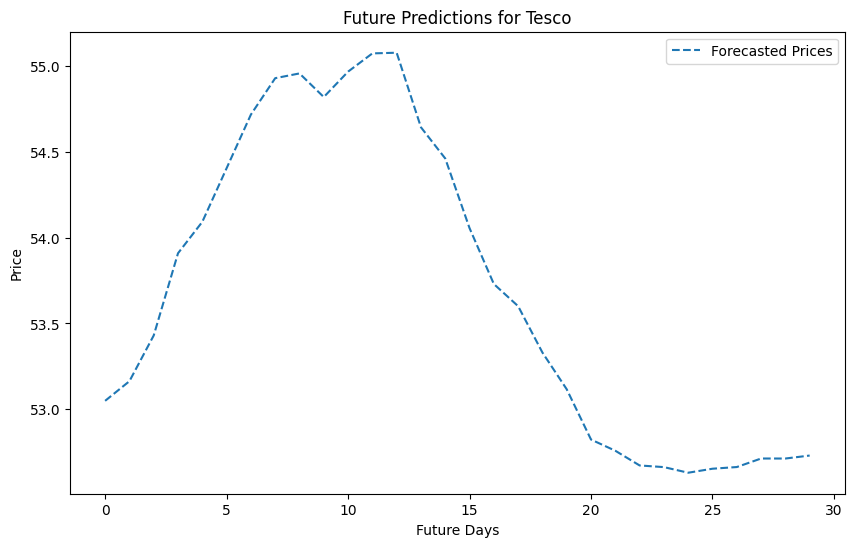

In [ ]:
model_training_and_metrics(tsco, 'Tesco')